<IPython.core.display.Javascript object>


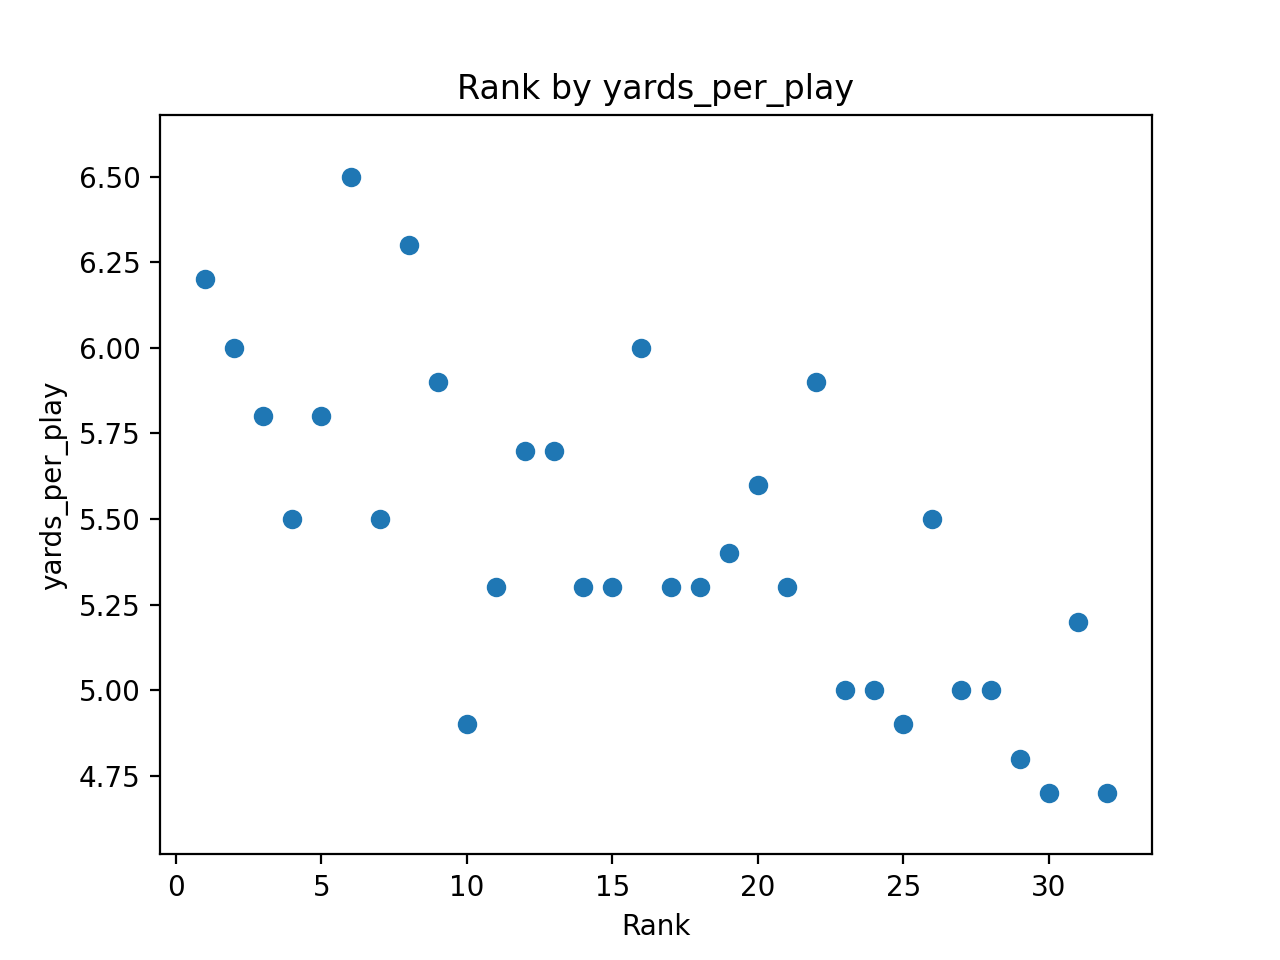

interactive(children=(Dropdown(description='Y-axis Variable:', options=('points_scored', 'total_yards', 'offen…

In [43]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib notebook

df = pd.read_csv("nfloffenseweek9.csv")

fig, ax = plt.subplots()
scatter = ax.scatter(df['rank'], df['points_scored'])
ax.set_title('Rank Scatter Plot')
ax.set_xlabel('Rank')
ax.set_ylabel('points_scored')

y_variable_widget = widgets.Dropdown(
    options=df.columns[3:],
    value='points_scored',
    description='Y-axis Variable:'
)

def update_scatter_plot(y_variable):
    scatter.set_offsets(df[['rank', y_variable]].values)
    y_min, y_max = min(df[y_variable]), max(df[y_variable])
    y_margin = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    ax.set_title('Rank by ' + y_variable)
    ax.set_ylabel(y_variable)
    fig.canvas.draw_idle()

interactive_plot = widgets.interactive(update_scatter_plot, y_variable=y_variable_widget)
plt.show()

display(interactive_plot)